In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###목표
- 사전 로컬환경에서 만들어둔 npz파일을 불러와서 신경망에 넣어 예측, 학습해보자

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = np.load("/content/drive/MyDrive/Colab Notebooks/SW 딥러닝/data/animals.npz")

In [4]:
X_train = data['X_train']
X_test = data['X_test']
y_train = data['y_train']
y_test = data['y_test']

In [5]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((960, 224, 224, 3), (240, 224, 224, 3), (960,), (240,))

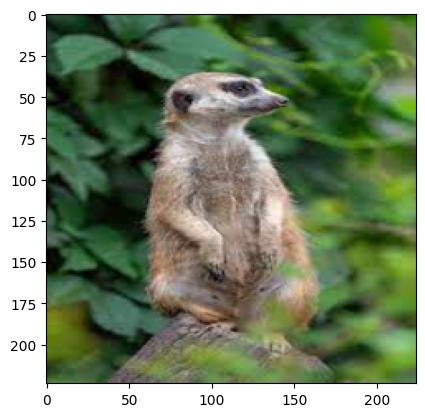

In [6]:
plt.imshow(X_train[1])

In [7]:
X_train[3]
# 가장 내부 배열은 R,G,B값에 따른 각각의 수치값들(세개의 수치로 하나의 픽셀의 색상을 최종결정)
# 그 다음 배열은 가로 한줄의 픽셀값
# 최종 배열은 이미지 전체의 픽셀들을 표

array([[[166, 164, 169],
        [168, 166, 171],
        [165, 160, 166],
        ...,
        [ 38,  37,  38],
        [ 52,  52,  52],
        [ 73,  73,  73]],

       [[159, 157, 160],
        [152, 150, 152],
        [145, 140, 142],
        ...,
        [ 34,  34,  35],
        [ 39,  39,  39],
        [ 48,  48,  48]],

       [[154, 153, 151],
        [141, 139, 137],
        [131, 129, 126],
        ...,
        [ 44,  44,  45],
        [ 35,  35,  35],
        [ 34,  34,  34]],

       ...,

       [[186, 187, 188],
        [176, 177, 178],
        [180, 181, 182],
        ...,
        [203, 205, 208],
        [186, 186, 192],
        [179, 179, 184]],

       [[181, 179, 186],
        [167, 166, 173],
        [157, 156, 163],
        ...,
        [184, 188, 192],
        [177, 174, 181],
        [133, 131, 137]],

       [[186, 185, 191],
        [173, 172, 178],
        [164, 163, 169],
        ...,
        [178, 181, 184],
        [178, 176, 183],
        [136, 135, 141]]

###색의 가산혼합
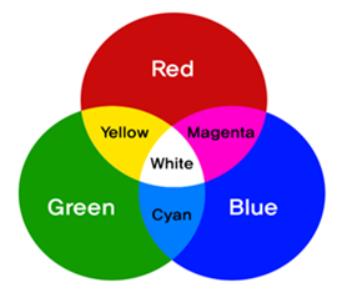

### MLP로 분류

In [8]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [9]:
model = Sequential()

model.add(Flatten(input_shape =(224, 224, 3)))

model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

model.add(Dense(3, activation='softmax'))

In [10]:
# sparse_categorical_crossentropy : 정답의 원핫 인코딩까지 같이 지원
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['acc'])

In [11]:
h = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.2)

Epoch 1/100
6/6 [==============================] - 5s 99ms/step - loss: 10286.4541 - acc: 0.3216 - val_loss: 6892.8047 - val_acc: 0.3854
Epoch 2/100
6/6 [==============================] - 0s 48ms/step - loss: 9887.8799 - acc: 0.3359 - val_loss: 4376.6914 - val_acc: 0.2917
Epoch 3/100
6/6 [==============================] - 0s 42ms/step - loss: 4003.9592 - acc: 0.3346 - val_loss: 6074.8999 - val_acc: 0.2917
Epoch 4/100
6/6 [==============================] - 0s 38ms/step - loss: 3564.7031 - acc: 0.3594 - val_loss: 2483.6936 - val_acc: 0.2917
Epoch 5/100
6/6 [==============================] - 0s 39ms/step - loss: 4420.1123 - acc: 0.3385 - val_loss: 3840.4856 - val_acc: 0.3854
Epoch 6/100
6/6 [==============================] - 0s 38ms/step - loss: 6813.3901 - acc: 0.3216 - val_loss: 3958.1719 - val_acc: 0.3229
Epoch 7/100
6/6 [==============================] - 0s 40ms/step - loss: 3200.4802 - acc: 0.3424 - val_loss: 2705.0403 - val_acc: 0.3229
Epoch 8/100
6/6 [==============================

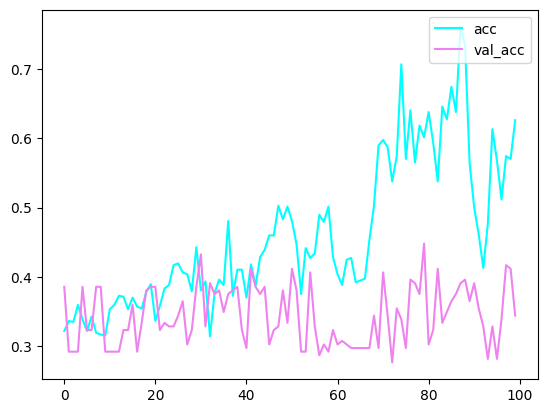

In [12]:
plt.plot(h.history['acc'], label='acc',color='cyan')
plt.plot(h.history['val_acc'], label='val_acc',color='violet')
plt.legend(loc='upper right')
plt.show()

In [13]:
# 정확도 외에 정밀도, 재현율, F!스코어 까지 확인
from sklearn.metrics import classification_report

In [14]:
pre = model.predict(X_test)
pre

8/8 [==============================] - 0s 6ms/step


array([[1.72714343e-11, 4.96600183e-23, 1.00000000e+00],
       [2.56533688e-36, 7.26575761e-24, 1.00000000e+00],
       [9.48023264e-33, 6.44477512e-15, 1.00000000e+00],
       [0.00000000e+00, 1.39349090e-26, 1.00000000e+00],
       [0.00000000e+00, 5.05154573e-29, 1.00000000e+00],
       [0.00000000e+00, 5.07654796e-27, 1.00000000e+00],
       [0.00000000e+00, 8.58339736e-15, 1.00000000e+00],
       [0.00000000e+00, 9.93955775e-18, 1.00000000e+00],
       [0.00000000e+00, 5.63042068e-29, 1.00000000e+00],
       [0.00000000e+00, 1.07645474e-06, 9.99998927e-01],
       [1.23436864e-38, 2.45546884e-33, 1.00000000e+00],
       [4.20848937e-21, 3.90486717e-01, 6.09513283e-01],
       [3.78883518e-36, 8.36689353e-23, 1.00000000e+00],
       [0.00000000e+00, 2.78430789e-13, 1.00000000e+00],
       [5.86314197e-35, 3.48817095e-24, 1.00000000e+00],
       [6.05309612e-33, 6.66693026e-15, 1.00000000e+00],
       [0.00000000e+00, 1.54623131e-32, 1.00000000e+00],
       [4.20215180e-14, 9.99995

In [15]:
# argmax : 가장 큰값의 인덱스를 변환해주는 함수
# axis=1 : 예측값이 2차원 배열이므로 열방향(좌->우)인 값들 중에서 비교하겠다는 뜻
np.argmax(pre, axis=1)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2])

In [16]:
print(classification_report(y_test, np.argmax(pre,axis=1)))
# support : 데이터의 개수
# pre 값이 각 클래스에 대한 확률로 나오기 떄문에 그 중 가장 높은 값의 인덱스와 실제 정답을 비교하는 방식

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        87
           1       0.39      0.09      0.14        80
           2       0.32      0.95      0.47        73

    accuracy                           0.32       240
   macro avg       0.24      0.34      0.21       240
weighted avg       0.23      0.32      0.19       240



기존 MLP로는 3채널의 컬러이면서 배경이 전부 다른 다양한 이미지들을 분류하는데 어려움이 있음

### CNN 모델링

In [17]:
from tensorflow.keras.layers import Conv2D, MaxPool2D

In [18]:
cnn_model = Sequential()

# 1. 특성추출부(Conv - 특징이 되는 정보를 추출)
# filters : 필터의 개수
# kernel_size: 필터의 크기
# padding = 'same' : 원본데이터의 크기에 맞춰 알아서 패딩을 적용 (valid: 패딩적용x)
cnn_model.add(Conv2D(input_shape=(224,224,3), filters=128, kernel_size=(3,3), padding='same', activation='relu'))

# 2. 특성추출부(Pooling - 불필요한 정보를 삭제)
# pool_size : 디폴트 값은 (2x2)
cnn_model.add(MaxPool2D())

cnn_model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
cnn_model.add(MaxPool2D())

cnn_model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
cnn_model.add(MaxPool2D())

cnn_model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
cnn_model.add(MaxPool2D())

# 3. MLP(분류기)
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(16, activation='relu'))
cnn_model.add(Dense(3, activation='softmax'))

cnn_model.summary()

# cnn층 파라미터 수 계산
# 필터 크기(가로+세로+입력데이터의 채널수) + 필터개수 + 필터개수(b)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 128)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 256)     295168    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       295040    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 128)     

In [19]:
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['acc'])

In [20]:
cnn_model.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=128)

Epoch 1/20
6/6 [==============================] - 29s 2s/step - loss: 39.9994 - acc: 0.3255 - val_loss: 1.1546 - val_acc: 0.3854
Epoch 2/20
6/6 [==============================] - 5s 881ms/step - loss: 1.1143 - acc: 0.3685 - val_loss: 1.1018 - val_acc: 0.3125
Epoch 3/20
6/6 [==============================] - 5s 878ms/step - loss: 1.0857 - acc: 0.3607 - val_loss: 1.1097 - val_acc: 0.3177
Epoch 4/20
6/6 [==============================] - 5s 876ms/step - loss: 1.0766 - acc: 0.4115 - val_loss: 1.0690 - val_acc: 0.4323
Epoch 5/20
6/6 [==============================] - 5s 868ms/step - loss: 1.0657 - acc: 0.4284 - val_loss: 1.0995 - val_acc: 0.3750
Epoch 6/20
6/6 [==============================] - 5s 872ms/step - loss: 1.0637 - acc: 0.4297 - val_loss: 1.1310 - val_acc: 0.4427
Epoch 7/20
6/6 [==============================] - 5s 866ms/step - loss: 1.0557 - acc: 0.4753 - val_loss: 1.1065 - val_acc: 0.3750
Epoch 8/20
6/6 [==============================] - 5s 866ms/step - loss: 1.0463 - acc: 0.446

In [21]:
pre = cnn_model.predict(X_test)
print(classification_report(y_test, np.argmax(pre,axis=1)))

8/8 [==============================] - 4s 192ms/step
              precision    recall  f1-score   support

           0       0.46      0.47      0.46        87
           1       0.34      0.36      0.35        80
           2       0.45      0.40      0.42        73

    accuracy                           0.41       240
   macro avg       0.42      0.41      0.41       240
weighted avg       0.42      0.41      0.41       240



CNN 신경망이지만 직접 만든 모델로 한번에 좋은 결과를 얻기는 힘들다

### VGG16 전이학습

In [22]:
from tensorflow.keras.applications import VGG16

In [23]:
pre_trained_model2 = VGG16(input_shape=(224,224,3),
                          include_top=False,
                          weights='imagenet')

# include_top= False : 불러온 사전학습모델의 MLP층을 사용하지않고 특성 추출부만 사용(=특성 추출방식)
# -> 기존 이미지넷 챌린지 대회는 1000가지의 이미지를 분류하는 대회였기 때문에 우리가 해결하고자 하는
#    3가지 이미지 분류와는 출력을 다르게 설정해줘야함
# weights= 'imagenet' : 이미지넷 챌린지 대회에서 학습된 가중치 w를 그대로 사용

In [24]:
pre_trained_model2.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [25]:
cnn_model2 = Sequential()

cnn_model2.add(pre_trained_model2)

# 사전학습 VGG16모델의 특성추출부에 우리 문제에 맞는 MLP층 추가
cnn_model2.add(Flatten())
cnn_model2.add(Dense(256, activation='relu'))
cnn_model2.add(Dense(128, activation='relu'))
cnn_model2.add(Dense(32, activation='relu'))
cnn_model2.add(Dense(3, activation='softmax'))

cnn_model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 dense_10 (Dense)            (None, 256)               6422784   
                                                                 
 dense_11 (Dense)            (None, 128)               32896     
                                                                 
 dense_12 (Dense)            (None, 32)                4128      
                                                                 
 dense_13 (Dense)            (None, 3)                 99        
                                                                 
Total params: 21,174,595
Trainable params: 21,174,595


In [26]:
cnn_model2.compile(loss='sparse_categorical_crossentropy',
                  optimizer='Adam',
                  metrics=['acc'])

cnn_model2.fit(X_train, y_train,
              validation_split=0.2,
              epochs=50,
              batch_size=128)

Epoch 1/50
6/6 [==============================] - 63s 4s/step - loss: 16.4447 - acc: 0.3581 - val_loss: 1.8141 - val_acc: 0.3854
Epoch 2/50
6/6 [==============================] - 10s 2s/step - loss: 1.3434 - acc: 0.2995 - val_loss: 1.0759 - val_acc: 0.3906
Epoch 3/50
6/6 [==============================] - 11s 2s/step - loss: 1.1428 - acc: 0.3542 - val_loss: 1.1034 - val_acc: 0.3438
Epoch 4/50
6/6 [==============================] - 10s 2s/step - loss: 1.0889 - acc: 0.3711 - val_loss: 1.1046 - val_acc: 0.3490
Epoch 5/50
6/6 [==============================] - 10s 2s/step - loss: 1.0923 - acc: 0.3763 - val_loss: 1.0829 - val_acc: 0.3906
Epoch 6/50
6/6 [==============================] - 10s 2s/step - loss: 1.0948 - acc: 0.3490 - val_loss: 1.2132 - val_acc: 0.3906
Epoch 7/50
6/6 [==============================] - 10s 2s/step - loss: 1.1336 - acc: 0.3555 - val_loss: 1.0952 - val_acc: 0.3438
Epoch 8/50
6/6 [==============================] - 10s 2s/step - loss: 1.0836 - acc: 0.3893 - val_loss: 

### 결과는 일반 CNN보다 조금 더 좋았지만 더욱 튜닝을 할 시

In [27]:
# 미세조정방식 (우리 데이터에 맞게 일부 층들을 재학습)

pre_trained_model2 = VGG16(input_shape=(224,224,3),
                          include_top=False,
                          weights='imagenet')

In [28]:
for layer in pre_trained_model2.layers :
    print(layer.name)

input_2
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_pool


In [29]:
for layer in pre_trained_model2.layers :
    if layer.name == "block5_conv3" :
      layer.trainable = True
    else : # 나머지 층들은 학습이 불가능하도록 동결!
      layer.trainable = False

In [30]:
cnn_model3 = Sequential()

cnn_model3.add(pre_trained_model2)
cnn_model3.add(Flatten())
cnn_model3.add(Dense(256, activation='relu'))
cnn_model3.add(Dense(128, activation='relu'))
cnn_model3.add(Dense(32, activation='relu'))
cnn_model3.add(Dense(3, activation='softmax'))

cnn_model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 25088)             0         
                                                                 
 dense_14 (Dense)            (None, 256)               6422784   
                                                                 
 dense_15 (Dense)            (None, 128)               32896     
                                                                 
 dense_16 (Dense)            (None, 32)                4128      
                                                                 
 dense_17 (Dense)            (None, 3)                 99        
                                                                 
Total params: 21,174,595
Trainable params: 8,819,715
N

In [31]:
cnn_model3.compile(loss='sparse_categorical_crossentropy',
                  optimizer = 'Adam',
                  metrics=['acc']
                  )

cnn_model3.fit(X_train, y_train,
              validation_split=0.2,
              epochs=50,
              batch_size=128
              )

Epoch 1/50
6/6 [==============================] - 7s 694ms/step - loss: 19.3829 - acc: 0.3854 - val_loss: 2.7291 - val_acc: 0.4635
Epoch 2/50
6/6 [==============================] - 4s 754ms/step - loss: 0.9751 - acc: 0.6901 - val_loss: 0.6261 - val_acc: 0.7031
Epoch 3/50
6/6 [==============================] - 4s 654ms/step - loss: 0.3101 - acc: 0.8984 - val_loss: 0.4388 - val_acc: 0.8073
Epoch 4/50
6/6 [==============================] - 4s 772ms/step - loss: 0.1399 - acc: 0.9583 - val_loss: 0.3801 - val_acc: 0.8594
Epoch 5/50
6/6 [==============================] - 4s 667ms/step - loss: 0.0574 - acc: 0.9844 - val_loss: 0.4192 - val_acc: 0.8750
Epoch 6/50
6/6 [==============================] - 4s 668ms/step - loss: 0.0181 - acc: 0.9987 - val_loss: 0.5030 - val_acc: 0.8750
Epoch 7/50
6/6 [==============================] - 4s 673ms/step - loss: 0.0066 - acc: 0.9987 - val_loss: 0.5656 - val_acc: 0.8698
Epoch 8/50
6/6 [==============================] - 4s 782ms/step - loss: 3.5799e-04 - acc:

In [32]:
pre = cnn_model3.predict(X_test)
print(classification_report(y_test, np.argmax(pre, axis=1)))

8/8 [==============================] - 8s 472ms/step
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        87
           1       0.77      0.88      0.82        80
           2       0.85      0.73      0.79        73

    accuracy                           0.82       240
   macro avg       0.82      0.81      0.81       240
weighted avg       0.82      0.82      0.82       240



# 0823

### 데이터 증강 (Data Augmentation)

- 모델의 과대적합을 방지하기 위한 방법 중 하나로 훈련데이터를 더 늘려주는 기법

In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [34]:
# ImageDataGenerator : 이미지 데이터를 생성하기 위한 조건을 설정하는 함수

aug = ImageDataGenerator(rotation_range=30, # 이미지 회전 각도
                         width_shift_range=0.2, # 20% 내외 수평이동
                         height_shift_range=0.2, # 20% 내외 수직이동
                         zoom_range=0.2, # 0.8~1.2배로 축소&확대
                         horizontal_flip=True, # 수평방향으로 뒤집기
                         fill_mode="nearest" # 이미지가 변형되면서 비는 공간을 가장 근처의 픽셀로 채워줌
                         )

In [35]:
pre_trained_model3 = VGG16(input_shape=(224,224,3),
                          include_top=False,
                          weights='imagenet')

for layer in pre_trained_model3.layers :
  if layer.name == "block5_conv3":
    layer.trainable = True
  else :
      layer.trainable = False

In [36]:
cnn_model4 = Sequential()
cnn_model4.add(pre_trained_model3)
cnn_model4.add(Flatten())
cnn_model4.add(Dense(256, activation='relu'))
cnn_model4.add(Dense(128, activation='relu'))
cnn_model4.add(Dense(32, activation='relu'))
cnn_model4.add(Dense(3, activation='softmax'))

cnn_model4.compile(loss='sparse_categorical_crossentropy',
                  optimizer = 'Adam',
                  metrics=['acc']
                  )

In [37]:
# flow : ImageDataGenerator로 설정한 조건을 통해 이미지를 실제로 생성하여 학습에 넣어주는 함수

cnn_model4.fit(aug.flow(X_train, y_train,
                        batch_size=128),
                        # 한 epoch당 미니배치가 7.5번 돌고 끝나게 됨
                        # (즉 1epoch에 128 * 7.5로 총 960장의 새로운 이미지 생성)
                        steps_per_epoch=len(X_train) / 128,
                        epochs=50
                        )

Epoch 1/50
7/7 [==============================] - 15s 2s/step - loss: 19.8914 - acc: 0.3646
Epoch 2/50
7/7 [==============================] - 13s 2s/step - loss: 0.9743 - acc: 0.5010
Epoch 3/50
7/7 [==============================] - 13s 2s/step - loss: 0.7220 - acc: 0.6687
Epoch 4/50
7/7 [==============================] - 13s 2s/step - loss: 0.6135 - acc: 0.7250
Epoch 5/50
7/7 [==============================] - 13s 2s/step - loss: 0.4786 - acc: 0.8010
Epoch 6/50
7/7 [==============================] - 13s 2s/step - loss: 0.4558 - acc: 0.8156
Epoch 7/50
7/7 [==============================] - 13s 2s/step - loss: 0.3836 - acc: 0.8396
Epoch 8/50
7/7 [==============================] - 13s 2s/step - loss: 0.4119 - acc: 0.8542
Epoch 9/50
7/7 [==============================] - 13s 2s/step - loss: 0.3320 - acc: 0.8740
Epoch 10/50
7/7 [==============================] - 13s 2s/step - loss: 0.3049 - acc: 0.8813
Epoch 11/50
7/7 [==============================] - 13s 2s/step - loss: 0.2997 - acc: 0.8

In [39]:
pre = cnn_model4.predict(X_test)
print(classification_report(y_test, np.argmax(pre, axis=1)))

8/8 [==============================] - 1s 127ms/step
              precision    recall  f1-score   support

           0       0.84      0.94      0.89        87
           1       0.87      0.93      0.90        80
           2       0.93      0.73      0.82        73

    accuracy                           0.87       240
   macro avg       0.88      0.86      0.87       240
weighted avg       0.88      0.87      0.87       240

